<a href="https://colab.research.google.com/github/TAUforPython/fuzzy/blob/main/fuzzy_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U git+https://github.com/TAUforPython/fuzz-regression.git

  Cloning https://github.com/TAUforPython/fuzz-regression.git to /tmp/pip-req-build-ziwbi2ww
  Running command git clone --filter=blob:none --quiet https://github.com/TAUforPython/fuzz-regression.git /tmp/pip-req-build-ziwbi2ww
  Resolved https://github.com/TAUforPython/fuzz-regression.git to commit bf44eb01d13ff3e11ebf89cf25eb12855bdb70b1
  Preparing metadata (setup.py) ... done
  Created wheel for fuzzy_regression: filename=fuzzy_regression-0.0.2-py3-none-any.whl size=7702 sha256=53d5844a3bfb8a42ffa62906428b1dd33bba62083dd21d22804e48f686421fff
  Stored in directory: /tmp/pip-ephem-wheel-cache-opaonuo7/wheels/a0/ae/c1/a12eac4441f83872763c7f2591ed51a6e2753935ec8a0b4f12
Successfully built fuzzy_regression


In [2]:
from fuzzy_regression import Regression

In [3]:
example2_keys = [1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.]
example2_values = [7., 8., 8., 12., 9., 10., 7., 10., 11., 12., 12., 13.]
example2 = list(zip(example2_keys, example2_values))
example2_expert = [0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8]

In [4]:
reg = Regression.of(example2)

sym.lin.LP
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  2.6645e-15  5e+01  4e-01  2e-16  1e+00
 1:  2.1567e+01  2.1825e+01  2e+01  2e-01  6e-17  7e-01
 2:  2.9085e+01  2.9143e+01  5e+00  4e-02  7e-16  2e-01
 3:  3.1562e+01  3.1569e+01  4e-01  4e-03  1e-15  2e-02
 4:  3.1871e+01  3.1871e+01  5e-03  5e-05  8e-16  2e-04
 5:  3.1875e+01  3.1875e+01  5e-05  5e-07  5e-14  2e-06
 6:  3.1875e+01  3.1875e+01  5e-07  5e-09  5e-14  2e-08
Optimal solution found.


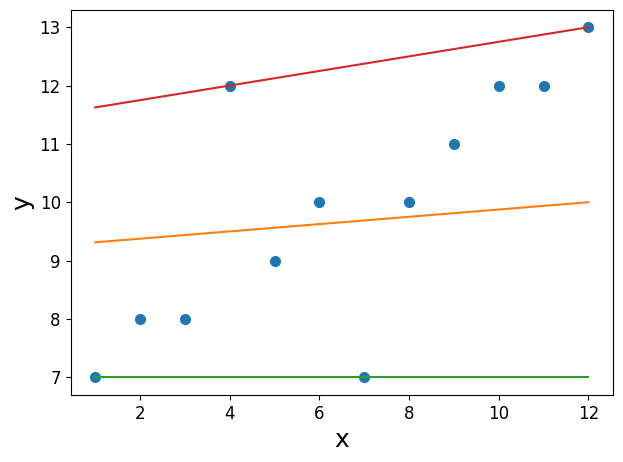

In [5]:
print('sym.lin.LP')
reg.symmetric.linear_LP().plot().show()

sym.lin.QP_exp
     pcost       dcost       gap    pres   dres
 0: -8.4504e+02 -8.0164e+02  4e+02  4e-01  2e-01
 1: -7.9009e+02 -8.0063e+02  1e+02  8e-02  3e-02
 2: -7.5235e+02 -7.6610e+02  2e+01  1e-02  4e-03
 3: -7.4380e+02 -7.5739e+02  2e+01  4e-03  2e-03
 4: -7.4364e+02 -7.5142e+02  1e+01  2e-03  9e-04
 5: -7.4466e+02 -7.5177e+02  9e+00  1e-03  5e-04
 6: -7.4444e+02 -7.4558e+02  1e+00  9e-05  3e-05
 7: -7.4445e+02 -7.4447e+02  2e-02  1e-06  4e-07
 8: -7.4446e+02 -7.4446e+02  2e-04  1e-08  4e-09
Optimal solution found.


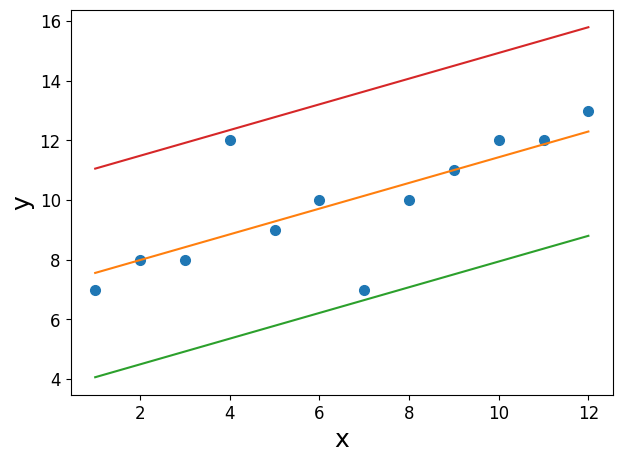

In [6]:
print('sym.lin.QP_exp')
reg.symmetric.linear_QP_expert(example2_expert).plot().show()

asym.lin.QP
     pcost       dcost       gap    pres   dres
 0: -1.2074e+03 -1.1642e+03  4e+02  4e-01  3e-01
 1: -1.1811e+03 -1.2349e+03  1e+02  1e-01  7e-02
 2: -1.1602e+03 -1.1808e+03  3e+01  2e-02  1e-02
 3: -1.1545e+03 -1.1721e+03  3e+01  1e-02  7e-03
 4: -1.1534e+03 -1.1541e+03  1e+00  3e-04  2e-04
 5: -1.1533e+03 -1.1533e+03  2e-02  6e-06  3e-06
 6: -1.1533e+03 -1.1533e+03  2e-04  6e-08  3e-08
Optimal solution found.


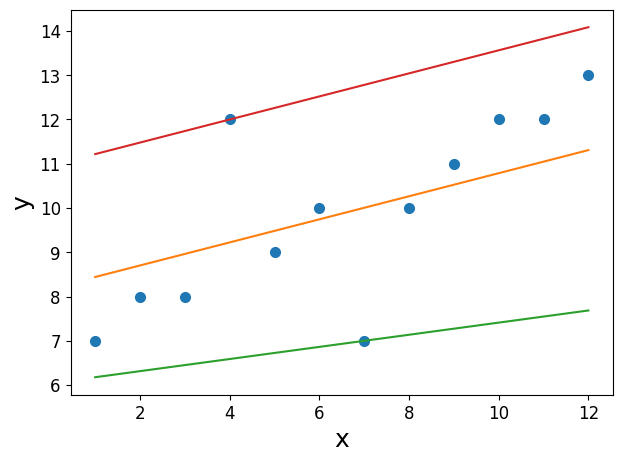

In [7]:
# asym
print('asym.lin.QP')
reg.asymmetric.linear_QP().plot().show()